In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
illustrative_columns = ['rs3', 'rs5', 'rs6', 'RS1', 'RS191', 'RS192', 'RS193', 'RS102RECAP', 'rs11recap2', 'RS11recap', 'RS193bis', 'RS2Recap', 'RS56Recap', 'RS2', 'RS11', 'RS102']

In [3]:
green_columns = ['weight', 'A11', 'A12', 'A13', 'A14', 'A4', 'A5', 'A5bis', "A8_1_slice", "A8_2_slice","A8_3_slice","A8_4_slice", "B1_1_slice", "B1_2_slice","B2_1_slice","B2_2_slice","B3", "B4", "B6", "C1_1_slice","C1_2_slice","C1_3_slice", "C1_4_slice","C1_5_slice","C1_6_slice", "C1_7_slice", "C1_8_slice", "C1_9_slice"]

In [4]:
orange_df = pd.read_csv('../data/orange_var_file.csv', sep=';', index_col=0)
orange_df.loc[:, orange_df.columns != 'weight'] = orange_df.loc[:, orange_df.columns != 'weight'].multiply(orange_df['weight'], axis=0)
orange_df.drop(columns=["weight"], inplace=True)
orange_df

/tmp/ipykernel_7618/3080538395.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.50125479 0.72291398 1.0396114  ... 0.         0.         0.9463952 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  orange_df.loc[:, orange_df.columns != 'weight'] = orange_df.loc[:, orange_df.columns != 'weight'].multiply(orange_df['weight'], axis=0)
/tmp/ipykernel_7618/3080538395.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5.00250958 0.72291398 3.11883421 ... 3.28408581 6.06606836 2.83918559]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  orange_df.loc[:, orange_df.columns != 'weight'] = orange_df.loc[:, orange_df.columns != 'weight'].multiply(orange_df['weight'], axis=0)
/tmp/ipykernel_7618/3080538395.py:2: FutureWarning: Setting an item of incompatible dtype is d

,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,...,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,2.501255,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,...,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510
1,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,...,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828
2,1.039611,3.118834,2.079223,2.079223,2.079223,3.118834,2.079223,2.079223,2.079223,2.079223,...,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223
3,0.976590,0.976590,1.953180,1.953180,1.953180,2.929770,1.953180,2.929770,1.953180,0.976590,...,1.953180,0.976590,1.953180,2.929770,2.929770,2.929770,1.953180,1.953180,0.976590,1.953180
4,0.000000,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,...,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.905997,2.717992,1.811995,2.717992,3.623989,2.717992,1.811995,1.811995,1.811995,0.905997,...,1.811995,0.905997,1.811995,0.905997,0.905997,0.905997,0.905997,0.905997,0.905997,0.905997
4996,0.000000,2.515769,3.773653,5.031537,3.773653,3.773653,2.515769,5.031537,2.515769,3.773653,...,2.515769,2.515769,3.773653,2.515769,2.515769,2.515769,2.515769,3.773653,2.515769,5.031537
4997,0.000000,3.284086,4.378781,4.378781,3.284086,2.189391,2.189391,4.378781,4.378781,3.284086,...,3.284086,2.189391,3.284086,3.284086,3.284086,2.189391,3.284086,3.284086,2.189391,3.284086
4998,0.000000,6.066068,6.066068,8.088091,6.066068,6.066068,4.044046,6.066068,6.066068,4.044046,...,6.066068,6.066068,4.044046,6.066068,4.044046,6.066068,4.044046,4.044046,2.022023,6.066068


In [5]:
green_df = pd.read_csv('../data/green_var_file.csv', sep=';', index_col=0)

green_df['A5'].fillna(0, inplace=True)
green_df['A5bis'].fillna(0, inplace=True)
green_df['weight'].fillna(1, inplace = True)
green_df.loc[:, green_df.columns != 'weight'] = green_df.loc[:, green_df.columns != 'weight'].multiply(green_df['weight'], axis=0)
weights = green_df['weight']
green_df.drop(columns=["weight"], inplace=True)

green_df

/tmp/ipykernel_7618/3087926664.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  green_df['A5'].fillna(0, inplace=True)
/tmp/ipykernel_7618/3087926664.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,...,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice
0,2.501255,0.000000,0.000000,0,2.501255,5.002510,0.000000,5.002510,5.002510,5.002510,...,7.503764,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510
1,0.722914,0.000000,0.000000,0,0.722914,3.614570,0.000000,1.445828,0.000000,0.000000,...,2.168742,2.891656,2.891656,2.891656,2.891656,2.891656,2.891656,2.891656,2.891656,2.891656
2,1.039611,0.000000,0.000000,0,1.039611,2.079223,0.000000,5.198057,5.198057,1.039611,...,4.158446,4.158446,4.158446,4.158446,4.158446,4.158446,4.158446,4.158446,4.158446,4.158446
3,0.976590,0.976590,0.976590,0,0.976590,0.976590,0.000000,1.953180,2.929770,1.953180,...,3.906360,3.906360,3.906360,4.882950,4.882950,4.882950,4.882950,4.882950,3.906360,3.906360
4,0.000000,0.812315,0.000000,0,1.624629,0.000000,0.812315,0.812315,0.812315,0.812315,...,2.436944,3.249258,3.249258,3.249258,3.249258,3.249258,3.249258,3.249258,3.249258,3.249258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.905997,0.000000,0.905997,0,2.717992,0.000000,0.905997,4.529987,5.435984,4.529987,...,3.623989,3.623989,3.623989,4.529987,4.529987,4.529987,4.529987,4.529987,3.623989,4.529987
4996,0.000000,1.257884,0.000000,0,2.515769,0.000000,1.257884,1.257884,3.773653,1.257884,...,2.515769,5.031537,6.289421,6.289421,6.289421,6.289421,6.289421,6.289421,6.289421,6.289421
4997,0.000000,1.094695,0.000000,0,2.189391,0.000000,2.189391,1.094695,1.094695,1.094695,...,4.378781,5.473476,5.473476,5.473476,5.473476,5.473476,5.473476,5.473476,5.473476,5.473476
4998,0.000000,0.000000,2.022023,0,6.066068,0.000000,2.022023,2.022023,2.022023,0.000000,...,6.066068,10.110114,8.088091,10.110114,10.110114,10.110114,10.110114,10.110114,10.110114,10.110114


In [6]:
df = pd.read_csv('../data/fic_epita_kantar_codes.csv', sep= ';')

In [7]:
scaler = StandardScaler()

# GEt the cluster for each orange part of the df
X_orange_scaled = scaler.fit_transform(orange_df)
kmeans_orange = KMeans(n_clusters=4, random_state=42)
df['cluster_orange'] = kmeans_orange.fit_predict(X_orange_scaled)

# GEt the cluster for each green part of the df
X_vert_scaled = scaler.fit_transform(green_df)
kmeans_vert = KMeans(n_clusters=6, random_state=42)
df['cluster_vert'] = kmeans_vert.fit_predict(X_vert_scaled)

In [10]:
# Select only the columns we need (in cas there are other useless columns)
df = df[green_columns + ['cluster_orange', 'cluster_vert'] + list(orange_df.columns) + illustrative_columns]

In [11]:
def affectation(data, target_column, illustrative_vars):
    X = data[illustrative_vars]
    y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return clf, accuracy, conf_matrix

Cluster Orange avec Vars Vert - Précision : 0.77


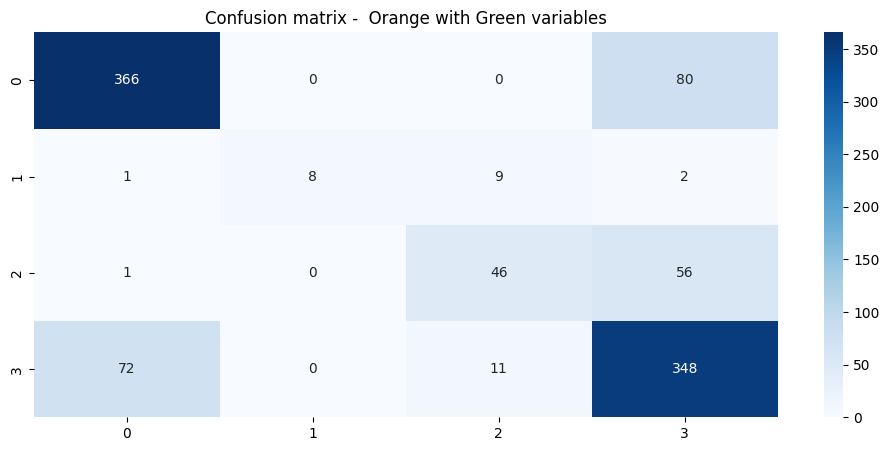

In [12]:
# Orange with green variables
clf_orange_vert, acc_orange_vert, conf_orange_vert = affectation(
    df, 'cluster_orange', green_columns
)
print(f"Cluster Orange avec Vars Vert - Précision : {acc_orange_vert:.2f}")
plt.figure(figsize=(12, 5))
sns.heatmap(conf_orange_vert, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix -  Orange with Green variables')
plt.show()

Cluster Orange avec Vars Spécifiques - Précision : 0.66


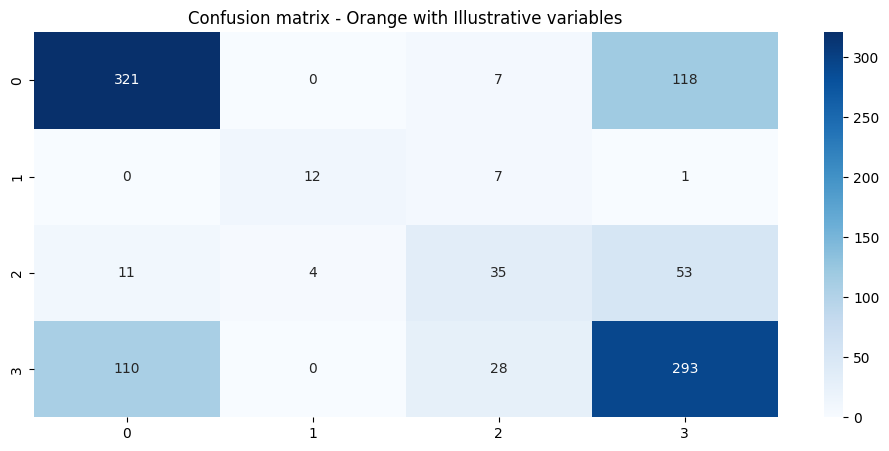

In [15]:
# Orange with illustrative variables
clf_orange_spec, acc_orange_spec, conf_orange_spec = affectation(
    df, 'cluster_orange', illustrative_columns
)
print(f"Cluster Orange avec Vars Spécifiques - Précision : {acc_orange_spec:.2f}")
plt.figure(figsize=(12, 5))
sns.heatmap(conf_orange_spec, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - Orange with Illustrative variables')
plt.show()

Cluster Orange avec Vars Spécifiques - Précision : 0.52


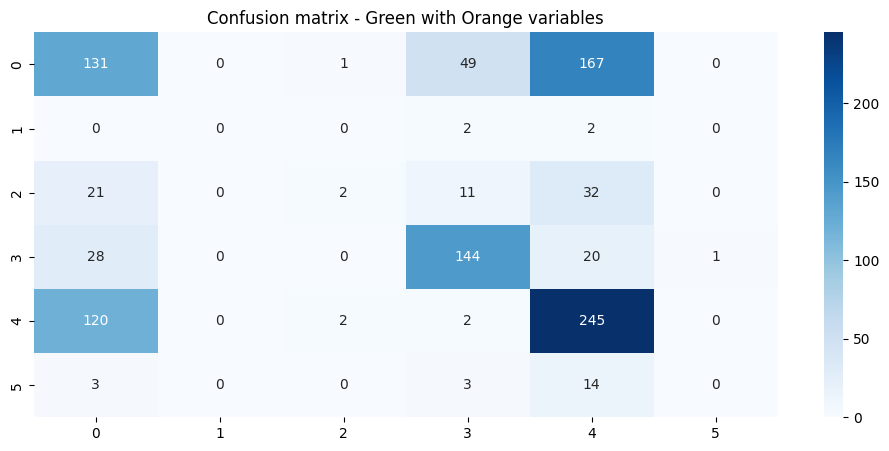

In [18]:
# Orange with orange variables
clf_vert_orange, acc_vert_orange, conf_vert_orange = affectation(
    df, 'cluster_vert', orange_df.columns
)
print(f"Cluster Orange avec Vars Spécifiques - Précision : {acc_vert_orange:.2f}")
plt.figure(figsize=(12, 5))
sns.heatmap(conf_vert_orange, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - Green with Orange variables')
plt.show()

Cluster Orange avec Vars Spécifiques - Précision : 0.72


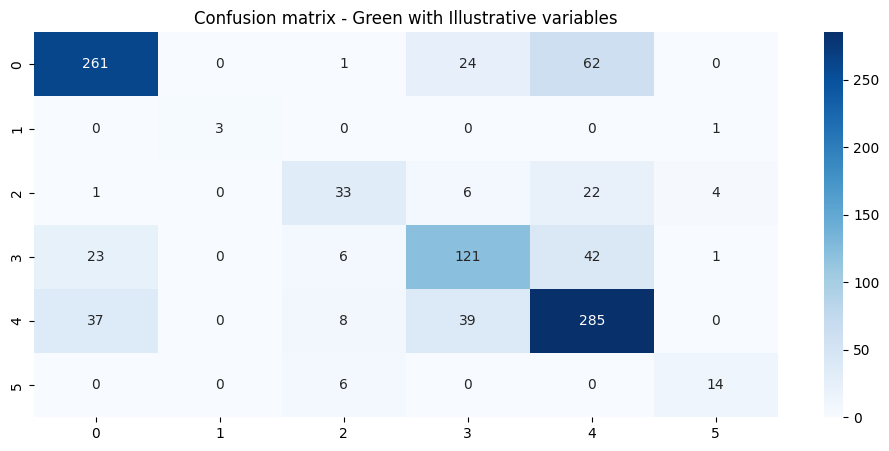

In [17]:
# Orange with green variables
clf_vert_spec, acc_vert_spec, conf_vert_spec = affectation(
    df, 'cluster_vert', illustrative_columns
)
print(f"Cluster Orange avec Vars Spécifiques - Précision : {acc_vert_spec:.2f}")
plt.figure(figsize=(12, 5))
sns.heatmap(conf_vert_spec, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - Green with Illustrative variables')
plt.show()